# Part II - Prosper Loan Analysis
## by Mattias Johansson

## Investigation Overview

This investigation aims to explore and analyze correlations between the prosper loans and APR that the loan takers will recieve. The parameters of focus is the loan amount, APR (Annual Percentage Rate), loan rate, occupation, loan status, employment status. Other parameters that helped the analysis are income and monthly loan payment. 

The end goal is to find an explanation to the APR value and size of the loans in terms to the previously stated parameters

## Dataset Overview

The dataset contains detailed information on 113,937 loans, with 81 different variables recorded for each loan. These variables include the loan amount, the borrower's interest rate, the current status of the loan, the borrower's income, and many other relevant details. Some information was gathered from 2009 and forward, and here we **only** use data that have been provided from 2009 and forward.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
sb.set(rc = {'figure.figsize':(14.70,8.27)})


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("data/prosperLoanData.csv")
df = df[["ListingKey","ListingNumber","ListingCreationDate","Term","LoanStatus","LoanNumber","BorrowerAPR","BorrowerRate","LenderYield","BorrowerState","Occupation","EmploymentStatus","EmploymentStatusDuration","IsBorrowerHomeowner","DateCreditPulled","CreditScoreRangeLower","CreditScoreRangeUpper","FirstRecordedCreditLine","DebtToIncomeRatio","IncomeRange","StatedMonthlyIncome","LoanKey","LoanMonthsSinceOrigination","LoanOriginalAmount","LoanOriginationDate","LoanOriginationQuarter","MonthlyLoanPayment","PercentFunded","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount","Investors"]]
df = df.dropna().reset_index(drop=True)

# Plot in log to easier see the distribution
def histo_log(df, column, xticks, xticks_name, xlabel, ylabel, title):
    log_binsize = 0.06
    bins = 10 ** np.arange(3, np.log10(df[column].max())+log_binsize, log_binsize)
    plt.figure(figsize=[14, 8])
    plt.hist(data = df, x = column, bins = bins)
    plt.xscale('log')
    plt.axvline(np.mean(df[column]),color = "red", label = f"mean: {np.round(np.mean(df[column]))} [$]")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]))} [$]")
    plt.xticks(xticks, xticks_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()


def subplot_histogram_categorical1(df):
    fig, ax = plt.subplots(nrows=1, figsize=[14.70, 8.27])

    default_color = sb.color_palette()[0]
    plt.subplots_adjust(hspace=1)
    plot1 = sb.countplot(data = df, x = 'Occupation', color = default_color, ax = ax, order = df['Occupation'].value_counts().index)
#     plot3 = sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[1], order = df['EmploymentStatus'].value_counts().index)
    plot1.set_title('Occupation for LoanOriginalAmount > 27000')
#     plot3.set_title('EmploymentStatus for LoanOriginalAmount > 27000')

    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
#     plot3.set_xticklabels(plot3.get_xticklabels(), rotation=0)
    plt.show()
def subplot_histogram_categorical2(df):
    fig, ax = plt.subplots(nrows=1, figsize=[14.70, 8.27])

    default_color = sb.color_palette()[0]
    plt.subplots_adjust(hspace=1)
#     plot1 = sb.countplot(data = df, x = 'Occupation', color = default_color, ax = ax[0], order = df['Occupation'].value_counts().index)
    plot3 = sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax, order = df['EmploymentStatus'].value_counts().index)
#     plot1.set_title('Occupation for LoanOriginalAmount > 27000')
    plot3.set_title('EmploymentStatus for LoanOriginalAmount > 27000')

#     plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plot3.set_xticklabels(plot3.get_xticklabels(), rotation=0)
    plt.show()


def histo(df, binsize, column, xlabel, ylabel, title):
    binsize = binsize
    bins = np.arange(0, df[column].max()+binsize, binsize)
    plt.figure(figsize=[14.70, 7.27])
    hist = plt.hist(data = df, x = column, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(np.mean(df[column]),color = "red",label = f"mean: {np.round(np.mean(df[column]),3)} [$]")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]),3)} [$]")
    plt.legend()
    plt.show()


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the loans

The distribution  of the LoanOriginalAmount. The loans take on values from 1k USD to more than 34k USD. When plotting the distrubution on a logarithmic shape we see a multimodal shape.

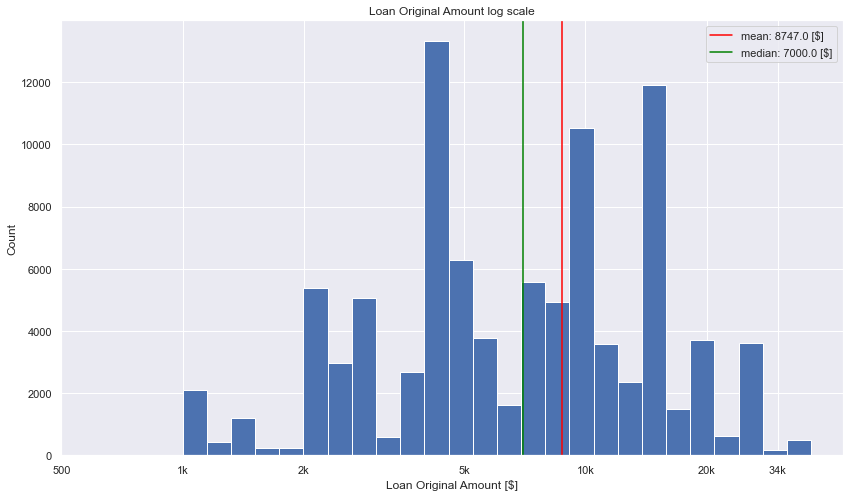

In [3]:
histo_log(df = df, column = "LoanOriginalAmount", xticks =[500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4], xticks_name=[500, '1k', '2k', '5k', '10k', '20k',"34k"], xlabel="Loan Original Amount [$]", ylabel= "Count", title="Loan Original Amount log scale")

## Distribution of the loans per occupation and employeestatus

The non-informational category "Other" in the "Occupation" variable are among the top loan takers in this dataset. The category Professional, Computer programmer, Executive, Teacher and Analyst are among the top 5 loan takers.

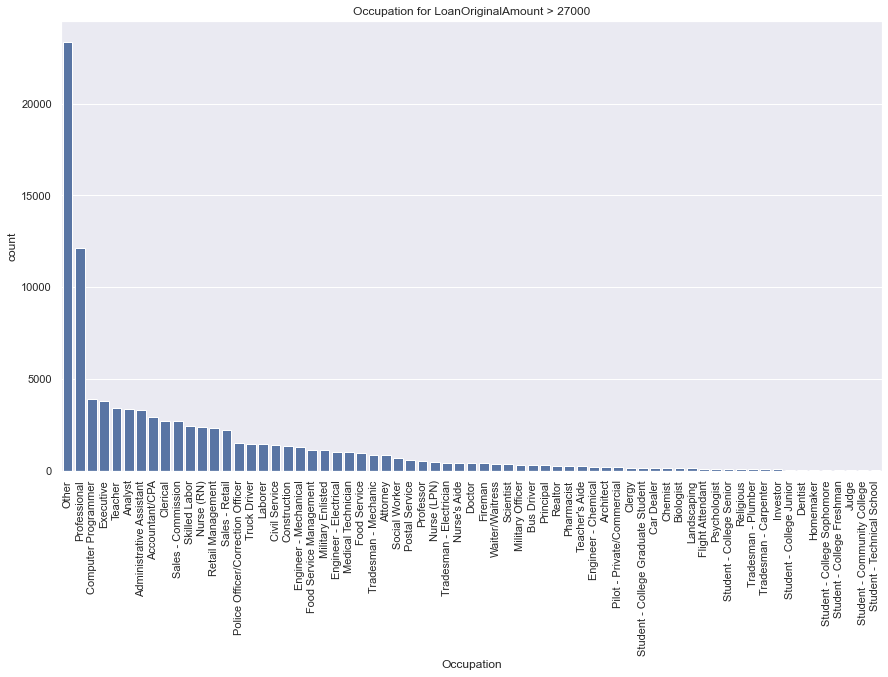

In [4]:
subplot_histogram_categorical1(df)

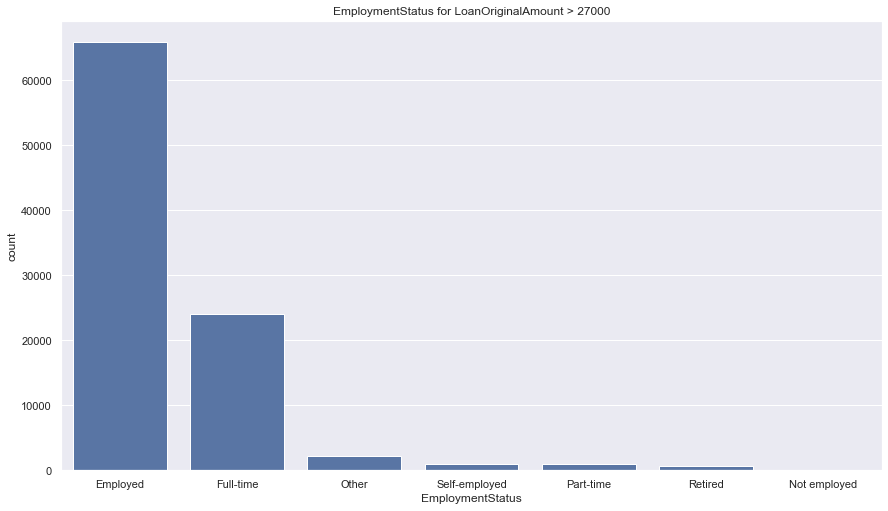

In [5]:
subplot_histogram_categorical2(df)

## Distribution of the loans for the most uncommon loan takers

The mean loan of the least occuring employment statuses is 5528 while the median is 4000. 

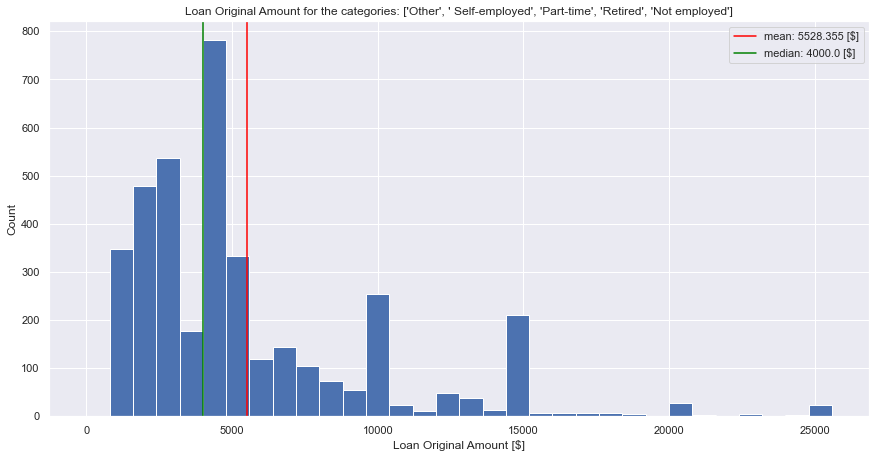

In [6]:
# Looking at the least occuring employment status and visualizing the distribution
cols = ["Other"," Self-employed","Part-time", "Retired","Not employed"]
df_employmentstatus = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")


## Distribution of the loans for the most common loan takers

The mean loan of the most occuring employment statuses is 8881 while the median is 7100. This is near the double than the uncommon loan takers.

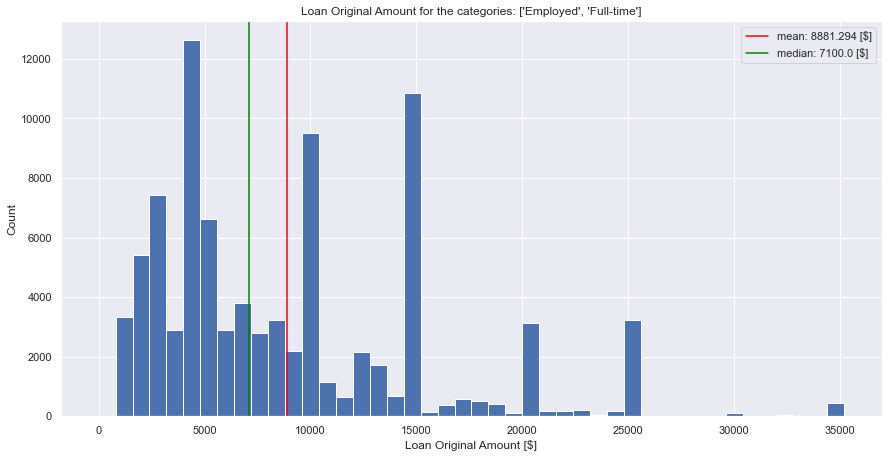

In [7]:
# Looking at the most occuring employment status and visualizing the distribution
cols = ["Employed", "Full-time"]
df_employmentstatus_full = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus_full, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")

## Income range and APR in relation to montly loan payment

We see that the less you pay back and the more you earn, the lower is the variance of the APR, contra the more you pay back and the more you earn the higher the variance of the APR.

In general, people that earn more also have a lower APR. 

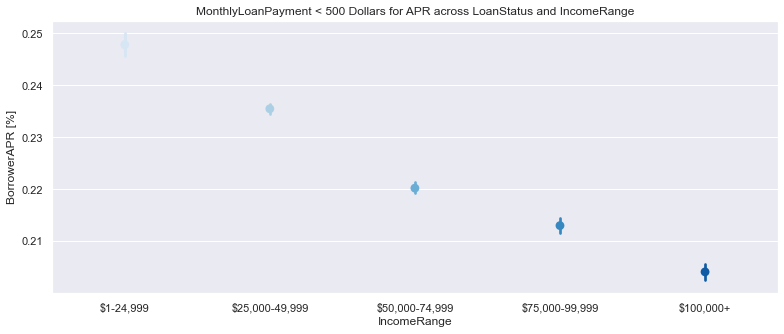

In [8]:
# Maybe "IncomeRange" will show any relationship when ordering the columns?
df_flag = (df['MonthlyLoanPayment'] < 500) 
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,5])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR', 
           palette = 'Blues', linestyles = '', dodge = 0.4, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999"][::-1])
plt.title('MonthlyLoanPayment < 500 Dollars for APR across LoanStatus and IncomeRange')
plt.ylabel('BorrowerAPR [%]')
ax.set_yticklabels([],minor = True)
plt.show();

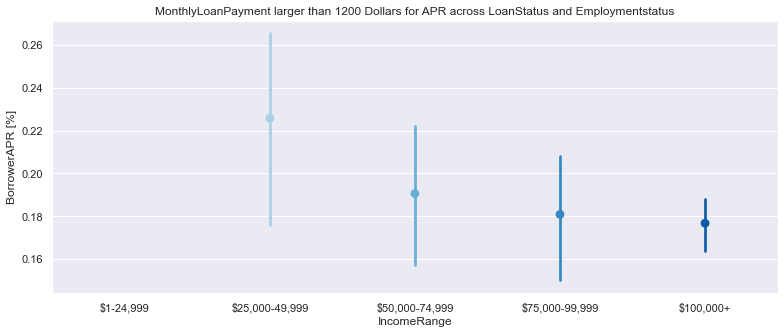

In [9]:
# And a larger filtering on the monthlyloanpayment
df_flag = (df['MonthlyLoanPayment'] >= 1200)
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,5])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR', 
           palette = 'Blues', linestyles = '', dodge = 0.4, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999"][::-1])
plt.title('MonthlyLoanPayment larger than 1200 Dollars for APR across LoanStatus and Employmentstatus')
plt.ylabel('BorrowerAPR [%]')
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [10]:
!jupyter nbconvert Prosper_loan_analysis_slides_deck.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Prosper_loan_analysis_slides_deck.ipynb to slides
[NbConvertApp] Writing 855458 bytes to Prosper_loan_analysis_slides_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\a373150\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\a373150\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\a373150\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\a373150\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\a373150\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_sin